## Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [16]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 2, 12)
X_train = training_set.iloc[:, [1,2,3]].values
y_train = training_set.iloc[:, 4].values
test_set = get_single_dataset("training_data/Typ2_FFT20Pkt1/training")
X_test = test_set.iloc[:, [1,2,3]].values
y_test = test_set.iloc[:, 4].values

## Training the Random Forest Regression model

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

## Predicting the Test set results on independent test set

In [18]:
y_pred = regressor.predict(X_test)

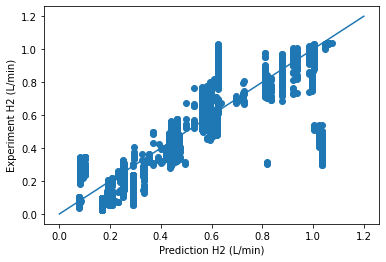

In [19]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction H2 (L/min)")
plt.ylabel("Experiment H2 (L/min)")
plt.plot([0, 1.2], [0, 1.2])
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3591180396755391

In [21]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.23832878170330335


In [22]:
z = np.arange(1, 4366)

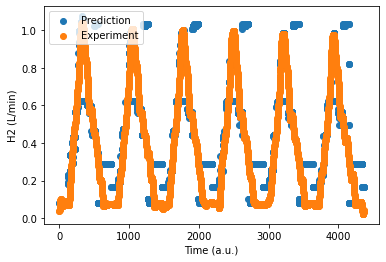

In [23]:
plt.scatter(z, y_pred, label='Prediction')
plt.scatter(z, y_test, label='Experiment')
plt.xlabel("Time (a.u.)")
plt.ylabel("H2 (L/min)")
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

16.456044695006273


In [25]:
ascii.write([z, y_test, y_pred], 'rfr_ztrain1test2.dat', names=['z', 'y_test', 'y_pred'], overwrite=True)